# Exploratory Data Analysis (EDA)

**Project:** MediGuide AI (MVP)  
**Goal:**  
Understand the healthcare dataset to:
- assess data quality,
- identify meaningful features,
- detect potential issues early,
before building any machine learning model.

> This project performs **risk screening**, not medical diagnosis.


In [12]:
# Core data manipulation libraries
import pandas as pd  # Used for tabular data operations
import numpy as np   # Used for numerical computations

# Visualization libraries (EDA purpose)
import matplotlib.pyplot as plt  # Base plotting
import seaborn as sns            # Statistical visualizations

# Global plotting style for consistency
sns.set(style="whitegrid")


In [13]:
# Store dataset path as a variable (DO NOT hardcode inline)
DATASET_PATH = "../../data/raw/mediguide-ai.csv"

# Load dataset
healthcare_df = pd.read_csv(DATASET_PATH)

# Preview first few rows
healthcare_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Number of rows = patients
# Number of columns = features + target
healthcare_df.shape

# Explicitly list column names
healthcare_df.columns.tolist()



['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [15]:
# High-level structural overview
healthcare_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# Calculate missing values per column
missing_values_count = healthcare_df.isnull().sum()

# Display only columns with missing data
missing_values_count[missing_values_count > 0]


Series([], dtype: int64)

In [17]:
# Define target column explicitly
TARGET_COLUMN = "Outcome"  # change only if dataset uses a different name

# Absolute count of each class
healthcare_df[TARGET_COLUMN].value_counts()


# Percentage distribution (helps detect imbalance)
healthcare_df[TARGET_COLUMN].value_counts(normalize=True) * 100


Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [18]:
# Descriptive statistics for numerical features
healthcare_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


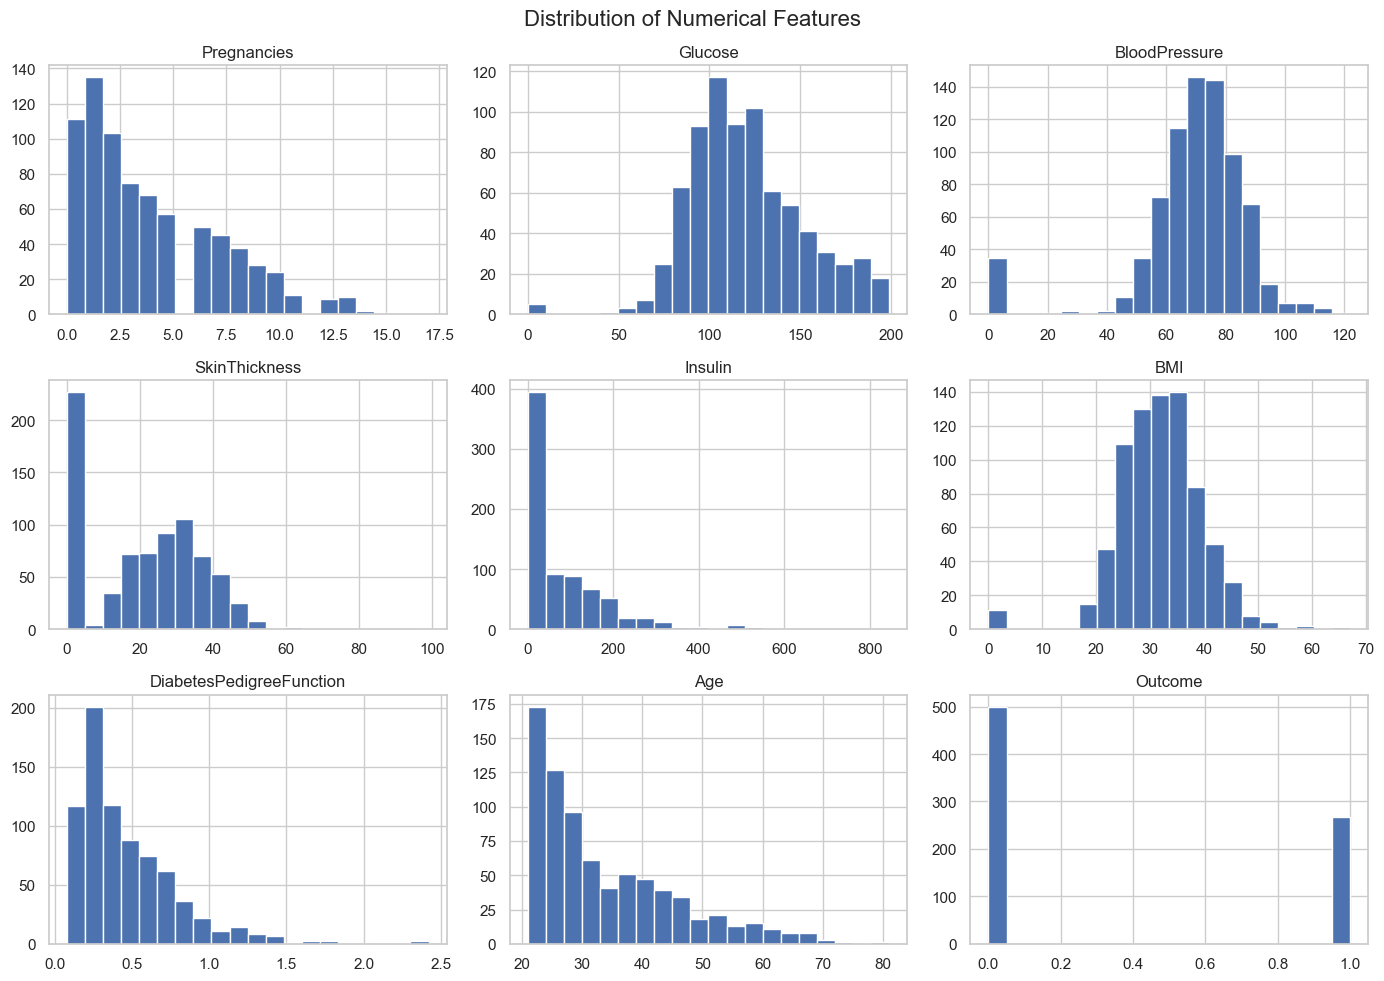

In [19]:
# Select only numerical columns
numerical_columns = healthcare_df.select_dtypes(include=np.number).columns.tolist()

# Plot distributions
healthcare_df[numerical_columns].hist(
    bins=20,
    figsize=(14, 10)
)

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


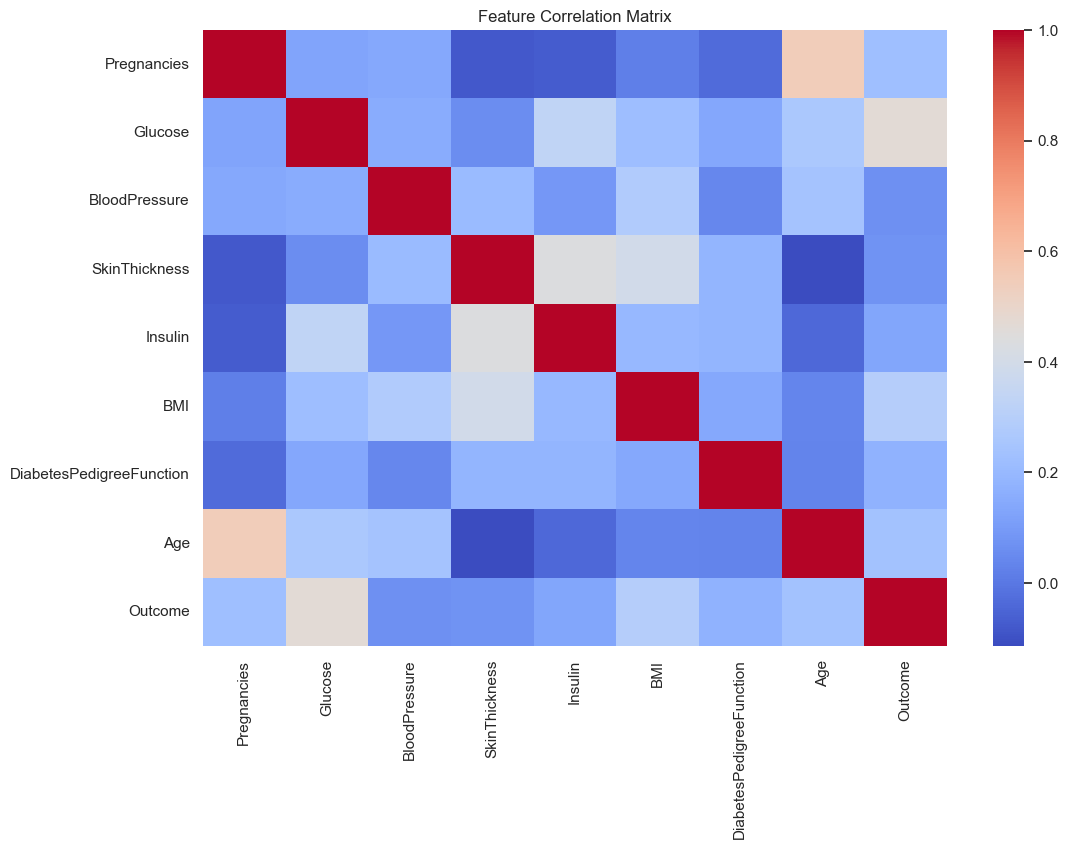

In [20]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    healthcare_df.corr(),
    cmap="coolwarm",
    annot=False
)

plt.title("Feature Correlation Matrix")
plt.show()


## EDA Summary & Decisions

- Dataset contains ___ rows and ___ features
- Target class distribution indicates ___ imbalance
- Key features likely to influence risk:
  - __________
- Data quality issues observed:
  - __________
- Planned preprocessing actions:
  - Handle zero values
  - Scale numerical features
  - Encode categorical variables

**Next Notebook:** `02_preprocessing.ipynb`
